# Линейный режим (аналитическое решение)

В линейном режиме $\epsilon^{(2)} \to 0$. Система уравнений принимает вид
$$
\begin{cases}
\epsilon_\perp \frac{\partial^2 \varphi_D}{\partial \tau^2} + \epsilon_\parallel \frac{\partial^2 \varphi_D}{\partial z^2} = 0, (z < 0),\\
\Delta \varphi_V(\tau, z) = 0, (z > 0),\\
\varphi_V(|\tau|>w/2+s, 0) = 0, \\
\varphi_D(|\tau|>w/2+s, 0) = 0, \\
\varphi_V(|\tau|<w/2, 0) = \varphi_0, \\
\varphi_D(|\tau|<w/2, 0) = \varphi_0, \\
\partial_z \varphi_V (w/2 < |\tau| < w/2+s) = \epsilon^{(0)}_{\parallel}\partial_z \varphi_D, \\
\partial_\tau \varphi_V (w/2 < |\tau| < w/2+s) = \partial_\tau \varphi_D.
\end{cases}
$$
С помощью замены $z = \sqrt{\epsilon_\parallel/\epsilon_\perp} u$ для $\varphi_D$ получаем
$$
\begin{cases}
\Delta \varphi_D(\tau, u) = 0, (z < 0) \\
\Delta \varphi_V(\tau, z) = 0, (z > 0)\\
\varphi_V(|\tau|>w/2+s, 0) = 0, \\
\varphi_D(|\tau|>w/2+s, 0) = 0, \\
\varphi_V(|\tau|<w/2, 0) = \varphi_0, \\
\varphi_D(|\tau|<w/2, 0) = \varphi_0, \\
\partial_z \varphi_V (w/2 < |\tau| < w/2+s) = \sqrt{\epsilon^{(0)}_{\parallel}\epsilon^{(0)}_{\perp}} \partial_u \varphi_D, \\
\partial_\tau \varphi_V (w/2 < |\tau| < w/2+s) = \partial_\tau \varphi_D,
\end{cases}
$$
что является хорошо известной на ёмкость копланарного волновода на подложке с диэлектрической проницаемостью $\sqrt{\epsilon^{(0)}_{\parallel}\epsilon^{(0)}_{\perp}}$. Решение этой задачи имеет вид

$$
\varphi_V(\tau, z) = \operatorname{Re} \int\limits_0^{\tau + iz} \frac{\mathrm{d}\zeta}{\sqrt{\left(\zeta^2 - w^2/4\right)\left(\zeta^2 - (w/2 + s)^2\right)}}, \\
\varphi_D(\tau, z) = \operatorname{Im} \int\limits_0^{\tau - i\sqrt{\epsilon_\parallel/\epsilon_\perp}z} \frac{\mathrm{d}\zeta}{\sqrt{\left(\zeta^2 - w^2/4\right)\left(\zeta^2 - (w/2 + s)^2\right)}}.
$$

# Import libs

In [12]:
from matplotlib import pyplot as plt
import numpy as np

# Set grid size & constants

In [13]:
x = np.linspace(-50, 50, 501).reshape((-1, 1))
y = np.linspace(-20, 20, 401)

epsilon_perp = 25000 #relative permittivity
epsilon_parallel = 11000

#If eps_perp = eps_par = 11.45 the lower dielectric is plain silicon

w = 20 #central electrode width
s = 25 #gap width

# Calculate Electric field distribution

In [14]:
zeta = x+y*1j #construct a complex variable
zeta[:, y<0] = x-y[y<0]*1j*np.sqrt(epsilon_parallel/epsilon_perp) #resize imaginary part due to a dielectric presence under 0  


E_tau = np.imag(1/(np.sqrt(zeta - w/2)*np.sqrt(zeta + w/2)*np.sqrt(zeta - w/2 - s)*np.sqrt(zeta + w/2 + s)))
E_z = np.real(1/(np.sqrt(zeta - w/2)*np.sqrt(zeta + w/2)*np.sqrt(zeta - w/2 - s)*np.sqrt(zeta + w/2 + s)))
E_z[:, y<0] = -np.sqrt(epsilon_parallel/epsilon_perp)*E_z[:,y<0] 
#resize the vertical component of the Electric field distribution

<ipython-input-14-634bcfe49eb8>:5: RuntimeWarning: divide by zero encountered in true_divide
  E_tau = np.imag(1/(np.sqrt(zeta - w/2)*np.sqrt(zeta + w/2)*np.sqrt(zeta - w/2 - s)*np.sqrt(zeta + w/2 + s)))
<ipython-input-14-634bcfe49eb8>:5: RuntimeWarning: invalid value encountered in true_divide
  E_tau = np.imag(1/(np.sqrt(zeta - w/2)*np.sqrt(zeta + w/2)*np.sqrt(zeta - w/2 - s)*np.sqrt(zeta + w/2 + s)))
<ipython-input-14-634bcfe49eb8>:6: RuntimeWarning: divide by zero encountered in true_divide
  E_z = np.real(1/(np.sqrt(zeta - w/2)*np.sqrt(zeta + w/2)*np.sqrt(zeta - w/2 - s)*np.sqrt(zeta + w/2 + s)))
<ipython-input-14-634bcfe49eb8>:6: RuntimeWarning: invalid value encountered in true_divide
  E_z = np.real(1/(np.sqrt(zeta - w/2)*np.sqrt(zeta + w/2)*np.sqrt(zeta - w/2 - s)*np.sqrt(zeta + w/2 + s)))


# Graphs

Text(0.5, 0, '$\\tau$')

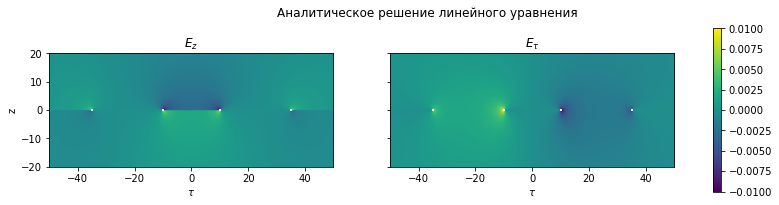

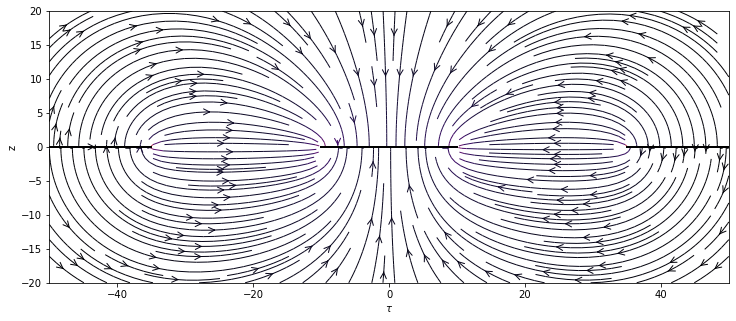

In [15]:
fig, axes = plt.subplots(1,2,figsize=(14,3), sharey=True)
im1=axes[1].imshow(E_tau.T, vmin=-0.01, vmax=0.01, 
                   extent=[np.min(x), np.max(x), np.min(y), np.max(y)], origin='lower')
axes[0].imshow(E_z.T, vmin=-0.01, vmax=0.01, 
                   extent=[np.min(x), np.max(x), np.min(y), np.max(y)], origin='lower')
axes[0].set_title('$E_z$')
axes[1].set_title('$E_{\\tau}$')
axes[0].set_ylabel('z')
axes[0].set_xlabel('$\\tau$')
axes[1].set_xlabel('$\\tau$')
plt.colorbar(im1, ax=axes)
plt.suptitle('Аналитическое решение линейного уравнения')

fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.streamplot(x.squeeze(), y, E_tau.T, E_z.T, color=np.hypot(E_tau, E_z).T, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)
ax.plot([np.min(x), - w/2 - s], [0, 0], color='black', linewidth=2)
ax.plot([- w/2, w/2], [0, 0], color='black', linewidth=2)
ax.plot([  w/2 + s, np.max(x)], [0, 0], color='black', linewidth=2)
ax.set_aspect('equal', 'box')
ax.set_ylabel('z')
ax.set_xlabel('$\\tau$')
